In [60]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 
import os
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import rasterio
from rasterio.plot import show
from rasterio.plot import show_hist
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.externals import joblib as jb
import plotly.graph_objects as go

In [3]:
files = ['august.csv', 'september.csv', 'october.csv'] 
PATH ='../data/private/csv/mat/'
df = [pd.read_csv(os.path.join(PATH, file)) 
      for file in files]
df = pd.concat(df, sort=False)
print('Total de registros: %s'%df['month'].count())

query = '(month == 8 and day >= 27) or (month == 9) or (month == 10 and day <= 7)'
df = df.query(query)
print('Total de registros: %s'%df['month'].count())
df.head()

Total de registros: 6353567
Total de registros: 2515607


,year,month,day,hour,minute,n_cluster,lon,lat,ind_x,ind_y,reflect,yyyyy_xx1,yyyyy_xx2,yyyyyyy_xx3,yyy_xx4,yyy_xx5,river,cxe,precipit,vil
1201483,2014.0,8.0,27.0,2.0,24.0,1.0,-58.5914,-2.7089,190.0,98.0,20.2031,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.8128,0.1473
1201484,2014.0,8.0,27.0,2.0,24.0,1.0,-58.5714,-2.7089,191.0,98.0,21.1250,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.9364,0.1666
1201485,2014.0,8.0,27.0,2.0,24.0,1.0,-58.6114,-2.7289,189.0,99.0,20.2031,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.8128,0.1473
1201486,2014.0,8.0,27.0,2.0,24.0,1.0,-58.5914,-2.7289,190.0,99.0,20.2031,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.8128,0.2011
1201487,2014.0,8.0,27.0,2.0,24.0,1.0,-58.5714,-2.7289,191.0,99.0,20.9375,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.9098,0.1874


In [4]:
columns = [
    'yyyyyyy_xx3', 'lon', 'lat', 'ind_x', 'ind_y', 
    'reflect', 'river', 'cxe', 'precipit', 'vil'
]
df2 = df[columns] 
df2.describe()


,yyyyyyy_xx3,lon,lat,ind_x,ind_y,reflect,river,cxe,precipit,vil
count,2.515607e+06,2.515607e+06,2.515607e+06,2.515607e+06,2.515607e+06,2.515607e+06,2.515607e+06,2.515607e+06,2.515607e+06,2.515607e+06
mean,3.432730e-02,-6.010752e+01,-3.046195e+00,1.141942e+02,1.148647e+02,2.865061e+01,1.071102e+00,1.363209e+00,9.827288e+00,1.463806e+00
std,2.648929e-01,8.620724e-01,8.563223e-01,4.310362e+01,4.281611e+01,7.380443e+00,3.261115e+00,4.809245e-01,2.250984e+01,2.514115e+00
min,0.000000e+00,-6.161140e+01,-4.768900e+00,3.900000e+01,3.900000e+01,1.996880e+01,0.000000e+00,1.000000e+00,7.841000e-01,6.850000e-02
25%,0.000000e+00,-6.083140e+01,-3.788900e+00,7.800000e+01,7.800000e+01,2.264060e+01,0.000000e+00,1.000000e+00,1.242700e+00,3.598000e-01
50%,0.000000e+00,-6.019140e+01,-2.968900e+00,1.100000e+02,1.110000e+02,2.662500e+01,0.000000e+00,1.000000e+00,2.444000e+00,6.428000e-01
75%,0.000000e+00,-5.939140e+01,-2.308900e+00,1.500000e+02,1.520000e+02,3.296880e+01,0.000000e+00,2.000000e+00,7.106400e+00,1.382800e+00
max,1.700000e+01,-5.837140e+01,-1.528900e+00,2.010000e+02,2.010000e+02,6.321880e+01,1.100000e+01,2.000000e+00,9.969676e+02,1.498319e+02


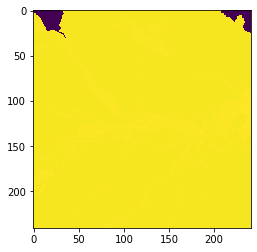

In [5]:
src = rasterio.open('../data/geodata/landcover.tif')
raster = src.read(1, masked=True)
show(raster)

In [6]:
ind_x, ind_y = df2['ind_x'].values, df2['ind_y'].values

In [7]:
landcover = []
for x, y in zip(ind_x, ind_y):
    x, y = int(x), int(y)
    z = int(raster[x][y])
    landcover.append(z)
    
df2['landcover'] = landcover
df2.head()

/home/adriano/.local/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,yyyyyyy_xx3,lon,lat,ind_x,ind_y,reflect,river,cxe,precipit,vil,landcover
1201483,0.0,-58.5914,-2.7089,190.0,98.0,20.2031,0.0,1.0,0.8128,0.1473,3
1201484,0.0,-58.5714,-2.7089,191.0,98.0,21.1250,0.0,1.0,0.9364,0.1666,3
1201485,0.0,-58.6114,-2.7289,189.0,99.0,20.2031,0.0,1.0,0.8128,0.1473,3
1201486,0.0,-58.5914,-2.7289,190.0,99.0,20.2031,0.0,1.0,0.8128,0.2011,3
1201487,0.0,-58.5714,-2.7289,191.0,99.0,20.9375,0.0,1.0,0.9098,0.1874,3


In [22]:
def plot_confusion_matrix(cm, ax, n):
    cmap = plt.cm.Blues
#     figsize = (16, 8)
#     fig, ax = plt.subplots(figsize=figsize)
    ax = ax
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.4)
    
    total_samples = cm.sum(axis=1)[:, np.newaxis]
    normed_conf_mat = cm.astype('float') / total_samples
    labels = ['Sem raios', 'Com raios']
    label_font = dict(fontweight='normal')
    title_font = dict(fontweight='normal', size=18)

    matshow = ax.matshow(cm, cmap=cmap)
    cb = plt.colorbar(matshow,cax=cax, orientation='vertical')
    

    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            cell_text = str(cm[i, j])
            cell_text += '\n(%.2f%%)'%(normed_conf_mat[i, j]*100)
            ax.text(x=j,
                    y=i,
                    s=cell_text,
                    va='center',
                    ha='center',
                    color="white" if normed_conf_mat[i, j] > 0.5 else "black")

    ax.set_xticklabels(['']+labels)
    ax.set_yticklabels(['']+labels, rotation=90, va='center')
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

#     ax.set_title('Matriz de confusão para %d testes'%((n*2)*0.2), fontdict=title_font)
    ax.set_xlabel('Classe prevista', fontdict=label_font)
    ax.set_ylabel('Classe real', fontdict=label_font)

    cb.ax.set_ylabel('Ocorrências', va='center', rotation=-270, labelpad=-50)

    return ax

In [9]:
columns

['yyyyyyy_xx3',
 'lon',
 'lat',
 'ind_x',
 'ind_y',
 'reflect',
 'river',
 'cxe',
 'precipit',
 'vil']

In [64]:
def best_accuracy(cm1, cm2):
    tn, fn =  cm1[0][0], cm1[0][1]
    fp, tp =  cm1[1][0], cm1[1][1]
    
    acc1 = (tn+tp)/(tn+fn+fp+tp)
    
    tn, fn =  cm2[0][0], cm2[0][1]
    fp, tp =  cm2[1][0], cm2[1][1]
    
    acc2 = (tn+tp)/(tn+fn+fp+tp)
    
    return acc1 > acc2

In [93]:
best = None

if type(best) == type(None):
    print('df')
type(best)

df


NoneType

df


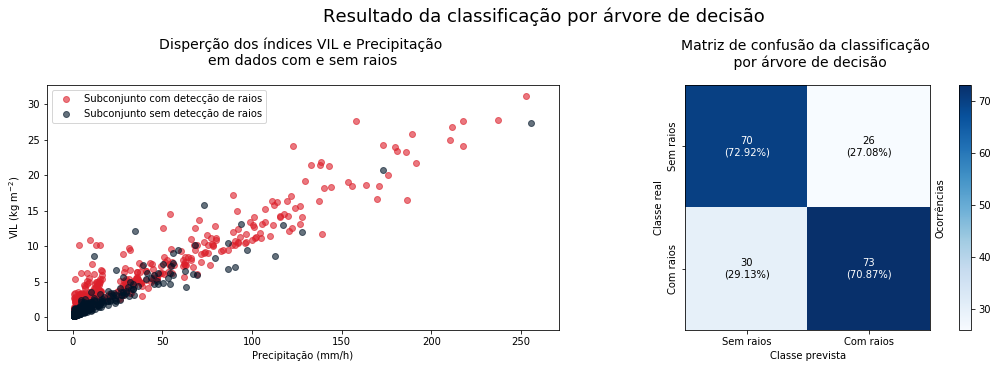

In [94]:
# columns.append('landcover')
# plt.style.use('dark_background')
epochs = 5
thr = 5
n = 500
best = None

supertitle_font = dict(fontweight='bold', size=16)
title_font = dict(fontweight='normal', size=14)
label_font = dict(fontweight='normal')

tn, fn = np.zeros(epochs), np.zeros(epochs)
fp, tp = np.zeros(epochs), np.zeros(epochs)
greater = np.zeros((2, 2))

for epoch in range(epochs):
    no = df2[df2[columns[0]] < thr].sample(n)
    yes = df2[df2[columns[0]] >= thr].sample(n)

    no[columns[0]] = 0
    yes[columns[0]] = 1

    ds = pd.concat([no, yes]).sample(n*2)

    targets = ds[[columns[0]]]
# features = ds[columns[5:]]
    features = ds[['precipit', 'vil']]

    X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=.2)

    dt = DecisionTreeRegressor().fit(X_train, y_train)

    y_pred = dt.predict(X_test)
#     print(y_test.values.ravel())

    cm = confusion_matrix(y_test.values, y_pred)
    
    if type(best) == type(None):
        print('df')
        best = cm
    
    best = cm if best_accuracy(cm, best) else best
    
    tn[epoch], fn[epoch] = cm[0][0], cm[0][1]
    fp[epoch], tp[epoch] = cm[1][0], cm[1][1]
    
#     print('----vvvv----')
#     print(cm)
    
cm = best
cm[0][0] = int(tn.mean()); cm[0][1] = int(fn.mean())
cm[1][0] = int(fp.mean()); cm[1][1] = int(tp.mean())


# accuracy = (tp+tn)/(tp+tn+fp+fn)
# precisionp = (tp)/(tp+fp)
# precisionn = (tn)/(tp+fp)
    
fig, ax = plt.subplots(1, 2, figsize=(15, 5), constrained_layout=True)

ax[0].scatter(yes['precipit'].values, yes['vil'].values, 
              color='#DC1F2A', alpha=.6, label='Subconjunto com detecção de raios')
ax[0].scatter(no['precipit'].values, no['vil'].values, 
              color='#001427',  alpha=.6, label='Subconjunto sem detecção de raios')
ax[0].set_title('Disperção dos índices VIL e Precipitação \n\
em dados com e sem raios', pad=20, fontdict=title_font)
ax[0].set_xlabel('Precipitação (mm/h)', fontdict=label_font)
ax[0].set_ylabel('VIL (kg m$^{-2}$)', fontdict=label_font)
ax[0].legend()

ax[1] = plt.gca()
plot_confusion_matrix(cm, ax[1], n)
ax[1].set_title('Matriz de confusão da classificação \n por árvore de decisão', \
               fontdict=title_font)

fig.suptitle('Resultado da classificação por árvore de decisão', size=18)
plt.show()


# print('Acurácia: %.2f%%'%(accuracy*100))
# print('Precisão verdadeiro positivo: %.2f%%'%(precisionp*100))
# print('Precisão para verdadeiro negativo: %.2f%%'%(precisionn*100))
# print(classification_report(y_test, y_pred))

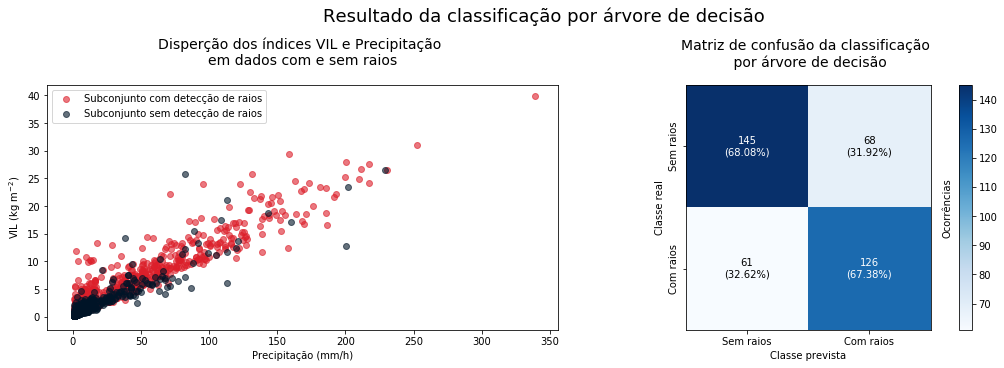

[[145  68]
 [ 61 126]]
Acurácia: 67.75%
Precisão verdadeiro positivo: 67.38%
Precisão para verdadeiro negativo: 77.54%


In [63]:
# columns.append('landcover')
# plt.style.use('dark_background')
thr = 5
n = 1000
no = df2[df2[columns[0]] < thr].sample(n)
yes = df2[df2[columns[0]] >= thr].sample(n)
supertitle_font = dict(fontweight='bold', size=16)
title_font = dict(fontweight='normal', size=14)
label_font = dict(fontweight='normal')

no[columns[0]] = 0
yes[columns[0]] = 1

ds = pd.concat([no, yes]).sample(n*2)

targets = ds[[columns[0]]]
# features = ds[columns[5:]]
features = ds[['precipit', 'vil']]

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=.2)

dt = DecisionTreeRegressor().fit(X_train, y_train)

y_pred = dt.predict(X_test)
cm = confusion_matrix(y_test, y_pred)


tp, fp = cm[0][0], cm[0][1]
fn, tn = cm[1][0], cm[1][1]
accuracy = (tp+tn)/(tp+fp+fn+tn)
precision = (tp)/(tp+fp)

fig, ax = plt.subplots(1, 2, figsize=(15, 5), constrained_layout=True)

ax[0].scatter(yes['precipit'].values, yes['vil'].values, 
              color='#DC1F2A', alpha=.6, label='Subconjunto com detecção de raios')
ax[0].scatter(no['precipit'].values, no['vil'].values, 
              color='#001427',  alpha=.6, label='Subconjunto sem detecção de raios')
ax[0].set_title('Disperção dos índices VIL e Precipitação \n\
em dados com e sem raios', pad=20, fontdict=title_font)
ax[0].set_xlabel('Precipitação (mm/h)', fontdict=label_font)
ax[0].set_ylabel('VIL (kg m$^{-2}$)', fontdict=label_font)
ax[0].legend()

ax[1] = plt.gca()
plot_confusion_matrix(cm, ax[1], n)
ax[1].set_title('Matriz de confusão da classificação \n por árvore de decisão', \
               fontdict=title_font)

fig.suptitle('Resultado da classificação por árvore de decisão', size=18)
plt.show()

tn, fn = cm[0][0], cm[0][1]
fp, tp = cm[1][0], cm[1][1]

print(cm)

accuracy = (tp+tn)/(tp+tn+fp+fn)
precisionp = (tp)/(tp+fp)
precisionn = (tn)/(tp+fp)

print('Acurácia: %.2f%%'%(accuracy*100))
print('Precisão verdadeiro positivo: %.2f%%'%(precisionp*100))
print('Precisão para verdadeiro negativo: %.2f%%'%(precisionn*100))
# print(classification_report(y_test, y_pred))

In [48]:
dt

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')